In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 31.9 MB/s 


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import string
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('/content/bip_2.csv')
df_copy1 = df
df.head()

,Unnamed: 0,Tanggal,User,Tweet,Sentimen
0,0,2022-08-04 15:32:23,gausacepuanjgg,tangan urg sakit njir udh vaksin😭,0
1,1,2022-08-04 15:32:06,soloposdotcom,Ratusan Nakes di Kota Madiun Mulai Disuntik Va...,1
2,2,2022-08-04 15:31:31,DepokGuide,RT @_Banyoe: Tiga dokter meninggal pasca disun...,0
3,3,2022-08-04 15:31:00,detik_sulsel,Pj Bupati Buteng Ancam Copot Kadis gegara ASN ...,1
4,4,2022-08-04 15:30:57,da_rull,"RT @Meilansyahriza: ""Jangan coba...SUAP SUAP s...",0


In [ ]:
import string, re

def cleansing(data):
  #lower text
  data = data.lower()

  #hapus punctuation
  remove =string.punctuation
  translator = str.maketrans(remove,' '*len(remove))
  data = data.translate(translator)

  #remove ASCII dan unicode
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)

  #remove newline
  data = data.replace('\n','')

  return data


In [ ]:
#jalankan cleansing data
review =[]
for index, row in df.iterrows():
    review.append(cleansing(row["Tweet"]))

df["Tweet"] = review

In [ ]:
df

,Unnamed: 0,Tanggal,User,Tweet,Sentimen
0,0,2022-08-04 15:32:23,gausacepuanjgg,tangan urg sakit njir udh vaksin,0
1,1,2022-08-04 15:32:06,soloposdotcom,ratusan nakes di kota madiun mulai disuntik va...,1
2,2,2022-08-04 15:31:31,DepokGuide,rt banyoe tiga dokter meninggal pasca disun...,0
3,3,2022-08-04 15:31:00,detik_sulsel,pj bupati buteng ancam copot kadis gegara asn ...,1
4,4,2022-08-04 15:30:57,da_rull,rt meilansyahriza jangan coba suap suap s...,0
...,...,...,...,...,...
9995,9995,2022-08-03 11:00:43,hekyie,eiandio kalau udah vaksin 3 enggak deh,0
9996,9996,2022-08-03 11:00:23,honestutdfans,fadilah2737 pambudies inikevin wooww adek u...,1
9997,9997,2022-08-03 11:00:10,jagapatidotcom,di saat kita baru izinin booster dari usia 16 ...,1
9998,9998,2022-08-03 11:00:10,jagapatidotcom,hong kong turunkan batas minimum vaksin waji...,1


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [ ]:
review = []
for index, row in df.iterrows():
     review.append(stopword.remove(row["Tweet"]))

df["Tweet"] = review

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

In [ ]:
review = []
for index, row in df.iterrows():
    word_tokens = word_tokenize((row["Tweet"]))
    #filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
      if w not in stop_words:
        filtered_sentence.append(w)
    result_text = ' '.join(filtered_sentence)
    review.append(result_text)

df["Tweet"] = review

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
Stemmer = factory.create_stemmer()

In [ ]:
#implementasi pada data kita
review = []
for index, row in df.iterrows():
     review.append(Stemmer.stem(row["Tweet"]))

df["Tweet"] = review

In [ ]:
import re
for i in range(0,len(df['Tweet'])):
  df['Tweet'][i] = re.sub(' +', ' ',df['Tweet'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
text = []
for i in range(0,len(df['Tweet'])):
  Tweet = df['Tweet'][i]
  text.append(Tweet)

In [ ]:
df.head()

,Unnamed: 0,Tanggal,User,Tweet,Sentimen
0,0,2022-08-04 15:32:23,gausacepuanjgg,tangan urg sakit njir udh vaksin,0
1,1,2022-08-04 15:32:06,soloposdotcom,ratus nakes kota madiun mulai suntik vaksin bo...,1
2,2,2022-08-04 15:31:31,DepokGuide,rt banyoe tiga dokter tinggal pasca suntik vak...,0
3,3,2022-08-04 15:31:00,detik_sulsel,pj bupati buteng ancam copot kad gegara asn to...,1
4,4,2022-08-04 15:30:57,da_rull,rt meilansyahriza jangan coba suap suap kalo m...,0


In [ ]:
df.to_csv('/content/bip_preprocess_result.csv')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df['Tweet'],df['Sentimen'],
                                                   test_size=0.2, stratify=df['Sentimen'], random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer()

In [ ]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test).todense()

In [ ]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
model.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0.8895

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


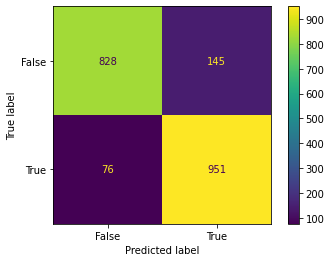

Accuracy of Naive Bayes classifier on test set : 0.89

All Evaluation Result


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


              precision    recall  f1-score   support

           0       0.92      0.85      0.88       973
           1       0.87      0.93      0.90      1027

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()

print("=============================================================================================")
print('Accuracy of Naive Bayes classifier on test set : {:.2f}'.format(model.score(x_test, y_test)))
print("=============================================================================================")
print()
print("=============================================================================================")
print("All Evaluation Result")
print("=============================================================================================")
print(classification_report(y_test, y_pred))


In [ ]:
import pickle

pickle.dump(vectorizer,open('count_vect.pkl', 'wb'))
pickle.dump(model, open('vect.pkl', 'wb'))